## Установка всех нужных библиотек

In [39]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Подключение библиотек

In [40]:
import pandas as pd
import numpy as np

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

## Парсинг данных и предобработка

In [44]:
df = pd.read_csv('../data/whole_data_practice3.csv')
#df['present'] = np.where(df['present'].isna(), int(0), int(1))
df.drop(['type'], axis=1, inplace=True)
df = df.dropna()
#df[df['type'] == df['present']]
df

,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,ipmag,e_ipmag,fuv_mag,nuv_mag,err,present,min_mag,max_mag
4,141.728736,2.834912,4,13.468,0.077,14.042,0.048,13.634,0.208,15.422,3.632,13.227,0.000,22.714,17.651,3.639082,1,13.29,13.41
5,168.580444,1.051704,4,11.143,0.027,11.592,0.025,13.105,3.575,10.993,0.165,11.012,0.052,18.347,14.734,3.579373,0,13.29,13.41
6,341.874650,-37.464627,5,9.482,0.000,10.149,0.031,10.986,1.915,11.035,2.490,9.073,0.000,22.512,15.160,3.141383,0,13.29,13.41
7,141.300348,3.499374,4,11.564,0.056,12.160,0.084,11.716,0.123,13.713,2.663,11.033,0.400,23.511,16.393,2.697571,0,13.29,13.41
8,129.795551,18.175921,6,10.179,0.038,10.731,0.013,11.355,1.902,10.829,1.883,10.018,0.010,20.863,14.930,2.676753,0,13.29,13.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64983,121.733932,34.774408,5,8.090,0.000,9.274,0.000,8.712,0.000,7.674,0.000,7.320,0.000,23.701,16.685,0.000000,0,8.39,8.43
64984,164.209694,5.631360,6,9.012,0.000,9.501,0.000,9.185,0.000,8.873,0.000,8.775,0.000,20.023,13.518,0.000000,0,8.39,8.43
64985,197.822409,-3.915387,3,8.558,0.000,9.722,0.000,9.115,0.000,8.152,0.000,7.835,0.000,22.929,16.748,0.000000,0,8.39,8.43
64986,216.499182,6.938758,4,9.354,0.000,9.858,0.000,9.633,0.000,9.306,0.000,9.203,0.000,18.501,13.158,0.000000,0,8.39,8.43


In [45]:
df.drop(['RAJ2000', 'DEJ2000', 'min_mag', 'max_mag'], axis=1, inplace=True)
df = df.fillna(df.median())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('present', axis=1))

## Указываем данные для обучения

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, 
    df['present'], 
    test_size=0.3, 
    random_state=42
)

In [47]:
undersampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X_train, y_train)

### Функция вывода матрицы несоответствий

In [48]:
def print_mat(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

### Функция для аналитики полученных данных

In [49]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
    #print(f"Сonfusion Matrix: {confusion_matrix(y_test, y_pred)}")
    #plt.savefig(f'../samples/{name}.png', bbox_inches='tight', dpi=300)
    print_mat(confusion_matrix(y_test, y_pred))

## Логистическая регрессия

Logistic Regression:
Accuracy: 0.690
Precision: 0.176
Recall: 0.578
F1-Score: 0.269


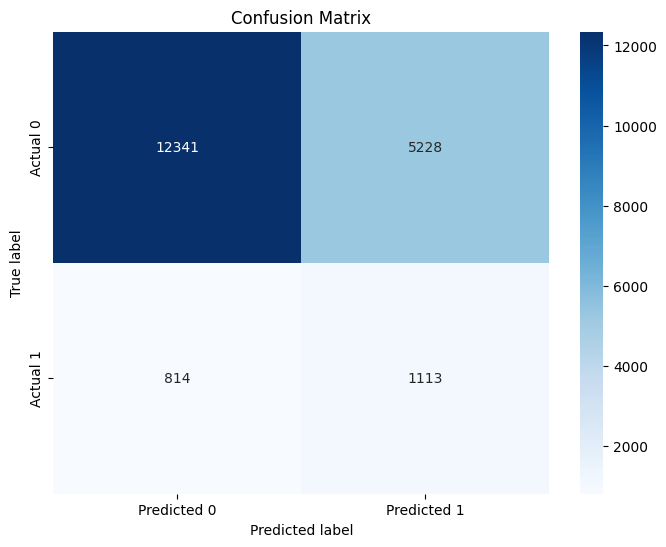

In [50]:
lr = LogisticRegression()
lr.fit(X_balanced, y_balanced)
print("Logistic Regression:")
evaluate_model(lr, X_test, y_test, "lr")

## SVM


SVM:
Accuracy: 0.737
Precision: 0.230
Recall: 0.708
F1-Score: 0.347


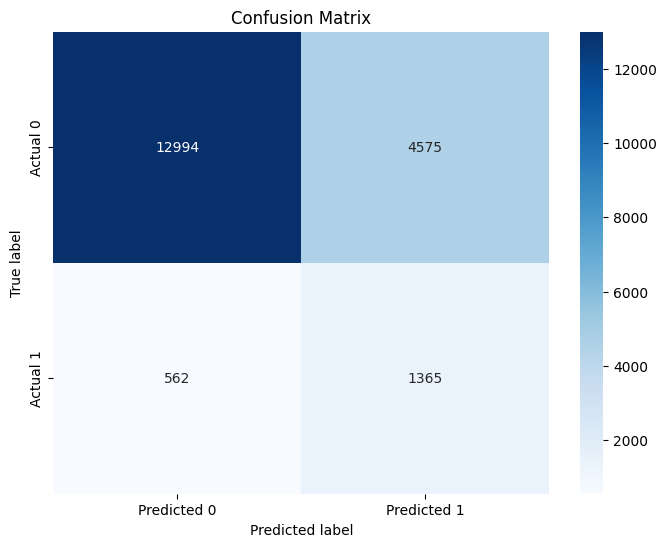

In [51]:
svm = SVC(kernel='rbf')
svm.fit(X_balanced, y_balanced)
print("\nSVM:")
evaluate_model(svm, X_test, y_test, "svm")

## Случайный лес


Random Forest:
Accuracy: 0.747
Precision: 0.240
Recall: 0.721
F1-Score: 0.361


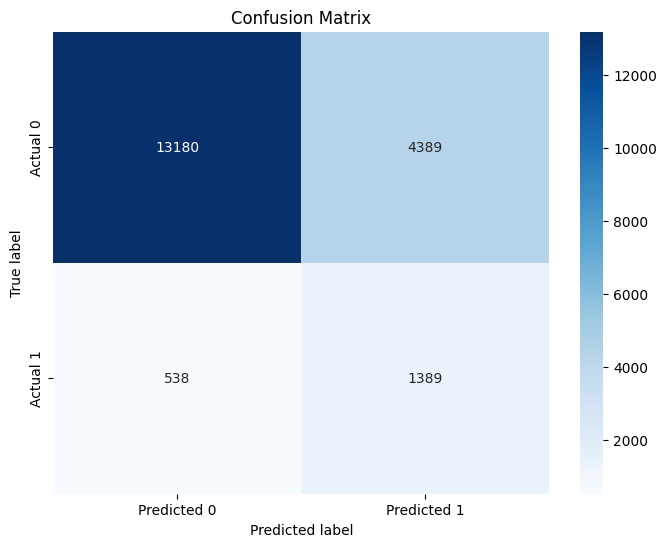

In [52]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_balanced, y_balanced)
print("\nRandom Forest:")
evaluate_model(rf, X_test, y_test, "rf")

## Градиентный бустинг


Gradient Boosting:
Accuracy: 0.725
Precision: 0.225
Recall: 0.731
F1-Score: 0.345


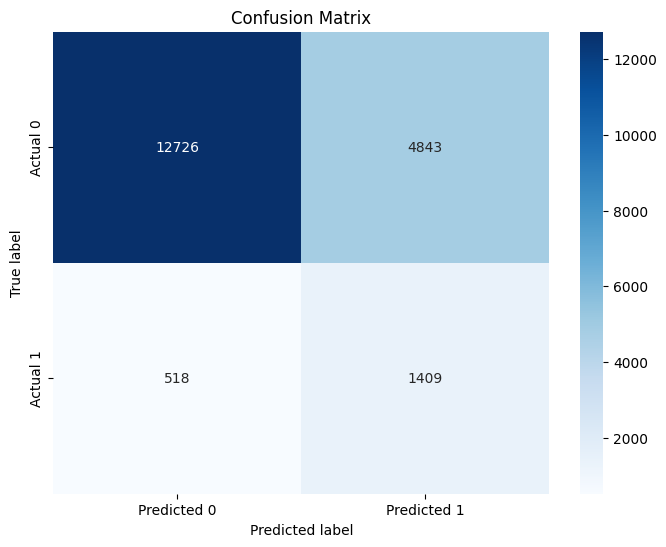

In [53]:
gb = GradientBoostingClassifier()
gb.fit(X_balanced, y_balanced)
print("\nGradient Boosting:")
evaluate_model(gb, X_test, y_test, "gb")